In [39]:
import pandas as pd
df = pd.read_csv('reddit_r_worldnews_dataset.csv')

In [46]:
from collections import Counter
import re #regular expression
import nltk
from nltk.corpus import stopwords

#combine headlines into one 
text = ''.join(df['Headline'])

#make lower case
text = re.sub(r'[^\w\s]', '', text.lower())

#tokenize
words = nltk.tokenize.word_tokenize(text)

#remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]
 
word_frequency = Counter(words)              
most_common_word = word_frequency.most_common(1)[0][0]       
               
print("The most common word in the data is:", most_common_word)


The most common word in the data is: ukraine


# Not surprising at all that Ukraine is the most common words mentioned in r/WorldNews

In [1]:
import pandas as pd
df = pd.read_csv('reddit_r_worldnews_dataset.csv')

In [3]:
df.info

<bound method DataFrame.info of      Negative  Neutral  Positive  Compound  \
0       0.244    0.756     0.000   -0.4404   
1       0.291    0.709     0.000   -0.6249   
2       0.000    1.000     0.000    0.0000   
3       0.000    0.726     0.274    0.5267   
4       0.419    0.581     0.000   -0.5574   
..        ...      ...       ...       ...   
675     0.000    0.560     0.440    0.6705   
676     0.196    0.804     0.000   -0.2960   
677     0.000    0.804     0.196    0.2960   
678     0.245    0.755     0.000   -0.3818   
679     0.302    0.698     0.000   -0.5994   

                                              Headline  
0    Ukraine to export electricity again after mont...  
1    Lions’ Den Terrorists Execute Palestinian for ...  
2    Reintegration: Brazil and Argentina to return ...  
3    Ukraine deputy minister praises Japan PM's vis...  
4                Swiss court upholds Basel begging ban  
..                                                 ...  
675  Dalai Lama 

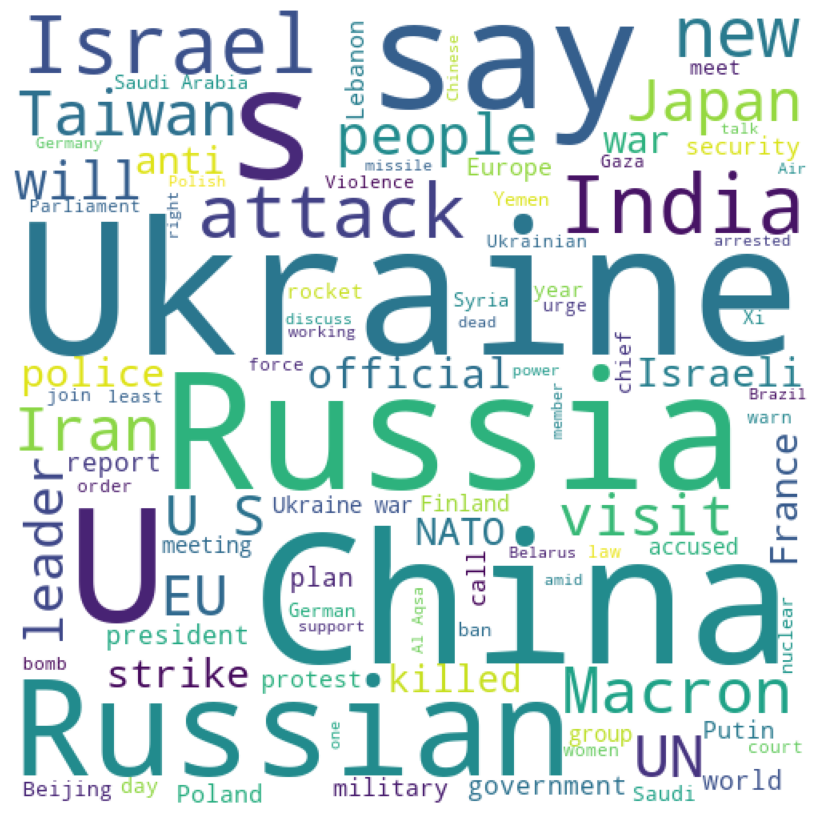

In [15]:
import pandas as pd
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

df = pd.read_csv('reddit_r_worldnews_dataset.csv')
headlines = ' '.join(df['Headline'])

wordcloud = WordCloud(width=500, height=500, 
                      background_color='white', 
                      min_font_size=10).generate(headlines)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show() 


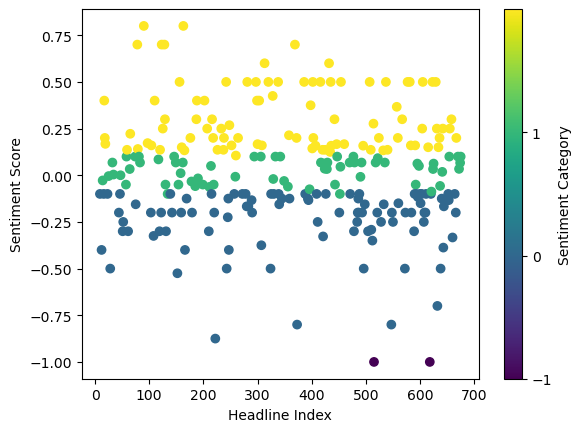

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('reddit_r_worldnews_dataset.csv')

# Define a function to get the polarity score for each headline
def get_sentiment_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Compute the polarity score for each headline
df['sentiment'] = df['Headline'].apply(get_sentiment_score)

df = df[df.sentiment != 0]

# categorize the sentiment scores as neutral, positive, or negative
df['sentiment_category'] = pd.cut(df['sentiment'], bins=[-1, -0.1, 0.1, 1], labels=['negative', 'neutral', 'positive'])

# Create a scatter plot of the distribution of sentiment categories
plt.scatter(x=df.index, y=df['sentiment'], c=pd.factorize(df['sentiment_category'])[0])
plt.xlabel('Headline Index')
plt.ylabel('Sentiment Score')
plt.colorbar(ticks=[-1, 0, 1 ], label='Sentiment Category')
plt.show()
